In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as sp

In [7]:
df = pd.read_csv('BayFleet2020v2.csv')
df=df.drop(columns=['Vehicle Category','GVWR Class','MPO'])
df

,Model Year,Fuel Technology,Vehicle Population
0,Unknown,BEV,6
1,Unknown,ICE,891
2,1975,BEV,8
3,1975,ICE,76187
4,1976,BEV,1
...,...,...,...
84,2020,ICE,80658
85,2020,PHEV,3483
86,2021,BEV,73
87,2021,ICE,1315


In [3]:
vmt = pd.read_excel('vmt.xlsx')
vmt

,Veh_Tech,2022.0,2023.0,2024.0,2025.0,2026.0,2027.0,2028.0,2029.0,2030.0,2031.0,2032.0,2033.0,2034.0,2035.0
0,LDA-Dsl,7.189155e+04,6.646821e+04,6.080893e+04,5.505971e+04,4.967966e+04,4.450877e+04,3.961583e+04,3.521779e+04,3.125626e+04,2.791827e+04,2.491934e+04,2.240231e+04,2.025132e+04,1.845096e+04
1,LDA-Elec,1.431606e+06,1.557997e+06,1.670388e+06,1.771326e+06,1.808999e+06,1.839189e+06,1.861406e+06,1.877095e+06,1.887071e+06,1.891682e+06,1.892638e+06,1.889936e+06,1.885332e+06,1.879925e+06
2,LDA-Gas,2.004080e+07,2.015654e+07,2.019893e+07,2.017053e+07,2.018330e+07,2.021134e+07,2.025129e+07,2.030255e+07,2.036572e+07,2.044111e+07,2.053108e+07,2.063023e+07,2.074003e+07,2.085877e+07
3,LDA-Phe,4.958398e+05,5.388980e+05,5.769655e+05,6.099502e+05,6.387856e+05,6.646759e+05,6.878436e+05,7.083505e+05,7.265021e+05,7.425039e+05,7.566894e+05,7.690944e+05,7.801314e+05,7.900311e+05
4,LDT1-Dsl,4.436516e+02,3.917256e+02,3.451041e+02,3.044509e+02,2.588954e+02,9.796264e+01,5.217059e+01,2.665256e+01,9.693067e+00,1.035689e+01,1.097167e+01,1.154021e+01,1.206239e+01,1.254244e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,LHD1-Gas,2.466857e+05,2.401296e+05,2.325615e+05,2.240826e+05,2.164452e+05,2.087252e+05,2.012540e+05,1.935851e+05,1.858737e+05,1.782733e+05,1.706270e+05,1.627477e+05,1.548220e+05,1.467599e+05
205,LHD2-Dsl,9.048311e+04,8.845888e+04,8.589142e+04,8.289560e+04,7.995004e+04,7.702694e+04,7.409663e+04,7.118971e+04,6.825707e+04,6.533212e+04,6.240885e+04,5.948309e+04,5.654310e+04,5.357671e+04
206,LHD2-Elec,NaN,NaN,2.211012e+02,5.641088e+02,1.027755e+03,1.703541e+03,2.595371e+03,3.684491e+03,4.953804e+03,6.391006e+03,7.982185e+03,9.713483e+03,1.157368e+04,1.354666e+04
207,LHD2-Gas,4.305394e+04,4.123690e+04,3.938593e+04,3.748276e+04,3.573334e+04,3.402283e+04,3.239615e+04,3.080794e+04,2.925164e+04,2.773975e+04,2.622593e+04,2.475896e+04,2.331457e+04,2.187430e+04


In [4]:
(1431606.5+495839.8)/ (20040803.4+1431606.5+495839.8)

0.08773781827507178

In [5]:
vmt['Veh_Tech']=='total'

0      False
1      False
2      False
3      False
4      False
       ...  
204    False
205    False
206    False
207    False
208     True
Name: Veh_Tech, Length: 209, dtype: bool

In [6]:
sum(vmt.where(vmt['Veh_Tech']!='total').fillna(0)[2022.0])

146968995.0529998

In [7]:
158518578/10.**6.

158.518578

In [104]:
df = pd.read_csv('FleetAll.csv')
df=df.drop(columns=['Vehicle Category','GVWR Class','MPO'])
df = df.where(df['Model Year'] != 'Unknown').dropna()
df

,Fuel Type,Model Year,Vehicle Population
1,Diesel,1979,1.0
2,Diesel,1992,1.0
3,Diesel,1993,1.0
4,Diesel,1999,1.0
5,Diesel,2000,3.0
...,...,...,...
397,Gasoline,2017,95789.0
398,Gasoline,2018,99834.0
399,Gasoline,2019,100730.0
400,Gasoline,2020,71194.0


In [11]:
#############
#Filling in the sales percentage from 2018 - 2035
############
years = np.arange(2018,2036)
years_missing=[2018, 2019, 2020, 2021, 2022, 2026, 2027, 2028,
       2029, 2030, 2031, 2032, 2033, 2034, 2035]
sales_percentage_missing = [7.6,7.6,8.1,12.8,17.9,35,43,51,59,68,76,82,88,94,100]
f= sp.interp1d(years_missing,sales_percentage_missing)
sales_percentage = []
for i in years:
    sales_percentage.append(f(i))


In [12]:
np.array(sales_percentage)

array([  7.6  ,   7.6  ,   8.1  ,  12.8  ,  17.9  ,  22.175,  26.45 ,
        30.725,  35.   ,  43.   ,  51.   ,  59.   ,  68.   ,  76.   ,
        82.   ,  88.   ,  94.   , 100.   ])

In [14]:
#total vehicle population in bay, last 5 years
total_pop_years = [2015,2016,2017,2018,2019,2020]
total_pop = [3032325,3063539,3033289,3027210,3020374,2855268]
#plt.plot(total_pop_years,total_pop)

In [16]:
totals = df.drop(columns=['Model Year'])
totals = totals.groupby(['Fuel Type']).sum()

totals

,Vehicle Population
Fuel Type,
Diesel,16612
Electric,130710
Gasoline,4318964


In [84]:
icef = df.where(df['Fuel Type'] == 'Gasoline').dropna()
icef = icef.drop('Fuel Type', axis = 1)
icef = icef.groupby(['Model Year']).sum()
icef

,Model Year,Vehicle Population
49,1975,5356.0
50,1976,358.0
51,1977,343.0
52,1978,512.0
53,1979,561.0
...,...,...
397,2017,95789.0
398,2018,99834.0
399,2019,100730.0
400,2020,71194.0


In [13]:
pvf = df.where(df['Fuel Technology'] == 'PHEV').dropna()
pvf

,Model Year,Fuel Technology,Vehicle Population
58,2011,PHEV,190.0
61,2012,PHEV,2539.0
64,2013,PHEV,4722.0
67,2014,PHEV,6670.0
70,2015,PHEV,4112.0
73,2016,PHEV,3651.0
76,2017,PHEV,10725.0
79,2018,PHEV,13128.0
82,2019,PHEV,8107.0
85,2020,PHEV,3483.0


In [14]:
np.array(pvf['Vehicle Population'])

array([  190.,  2539.,  4722.,  6670.,  4112.,  3651., 10725., 13128.,
        8107.,  3483.,    39.])

In [86]:
evf = df.where(df['Fuel Type'] == 'Electric').dropna()
evf = evf.where(evf['Model Year'] != 'Unknown').dropna()
evf = evf.drop('Fuel Type', axis = 1)
evf

,Model Year,Vehicle Population
21,1977,1.0
22,1992,1.0
23,1993,10.0
24,1994,1.0
25,1996,4.0
...,...,...
350,2003,13.0
351,2011,1.0
352,2012,10.0
353,2019,269.0


In [85]:
evf = df.where(df['Fuel Type'] == 'Electric').dropna()
evf = evf.where(evf['Model Year'] != 'Unknown').dropna()
evf = evf.drop('Fuel Type', axis = 1)
v = np.array(evf['Vehicle Population'])
a = v[18:]
v[18:] = a +np.array(pvf['Vehicle Population'])
evf['Vehicle Population'] = v

NameError: name 'pvf' is not defined

In [16]:
sum(evf['Vehicle Population'])

186473.0

In [17]:
sum(totals['Vehicle Population'])

2855268

In [18]:
186473.0/2855268

0.06530840537560748

In [19]:
evf

,Model Year,Vehicle Population
2,1975,8.0
4,1976,1.0
9,1980,3.0
19,1989,1.0
26,1995,1.0
29,1997,1.0
31,1998,2.0
33,1999,1.0
35,2000,1.0
37,2001,1.0


In [25]:
times = df.drop(columns=['Fuel Type'])
times = times.where(times['Model Year'] != 'Unknown').dropna()
times['Model Year'] = times['Model Year'].astype(int)
times = times.groupby(['Model Year']).sum()

In [26]:
shortened = times.drop(2021, axis = 0)
#shortened = shortened.drop(2020, axis = 0)

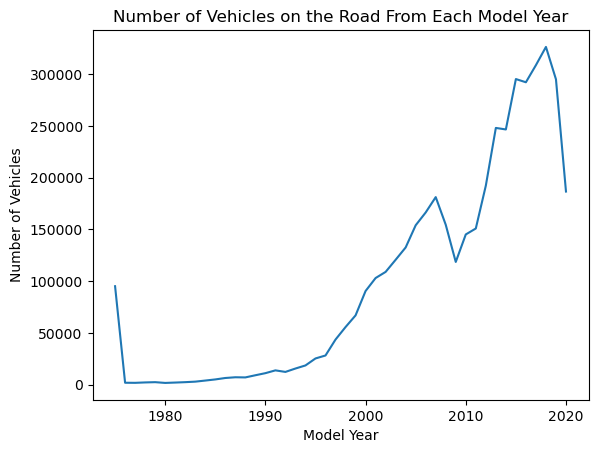

In [27]:
plt.plot(shortened)
plt.ylabel('Number of Vehicles')
plt.xlabel('Model Year')
plt.title('Number of Vehicles on the Road From Each Model Year')
plt.show()

In [41]:
times['Vehicle Population'][2018]

326147.0

In [29]:
times['Vehicle Population'][2012]

192218.0

In [30]:
np.log([1047,5979,202407])

array([ 6.95368421,  8.69600861, 12.2180358 ])

In [75]:
f2 = sp.CubicSpline([1980,1990,2002,2015,2018],np.log([1801,11219.0,108976.0-8000,295129.0-10050,326147.0-20000]), extrapolate=True)

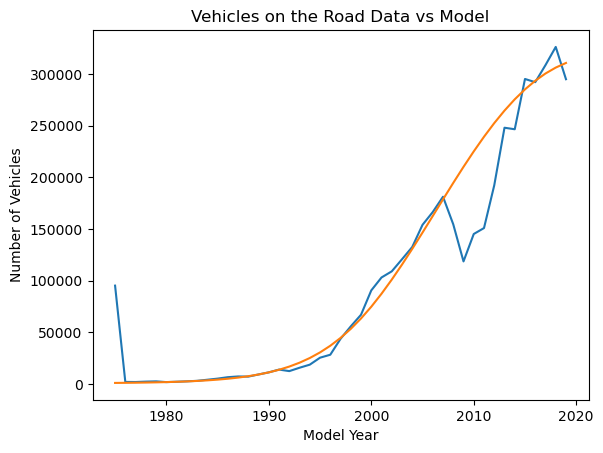

In [76]:
plt.figure()
plt.plot(np.arange(1975,2020),times['Vehicle Population'][np.arange(1975,2020)])
plt.plot(np.arange(1975,2020),np.exp(f2(np.arange(1975,2020))))
plt.ylabel('Number of Vehicles')
plt.xlabel('Model Year')
plt.title('Vehicles on the Road Data vs Model')
plt.show()

In [77]:
pops = np.array(times['Vehicle Population'])
weighted_avg_tot = 0
for i in range(47):
    weighted_avg_tot += pops[i]*(1975+i)

weighted_avg = weighted_avg_tot/sum(pops)
weighted_avg

2009.83158810058

In [78]:
def model(year):
    return 0.98323* np.exp(f2(year))

In [79]:
sum(pops)/sum(model(range(1960,2020)))

1.0001040180213532

In [80]:
weighted_model_tot = 0
for i in range(1960,2020):
    weighted_model_tot += model(i)*(i)

weighted_model = weighted_model_tot/sum(pops)
weighted_model

2009.8276601936905

In [95]:
df.where(df['Fuel Type'] == 'Electric').dropna()

,Fuel Type,Model Year,Vehicle Population
20,Electric,Unknown,6.0
21,Electric,1977,1.0
22,Electric,1992,1.0
23,Electric,1993,10.0
24,Electric,1994,1.0
...,...,...,...
350,Electric,2003,13.0
351,Electric,2011,1.0
352,Electric,2012,10.0
353,Electric,2019,269.0


In [106]:
evf = df.where(df['Fuel Type'] == 'Electric').dropna()
evf = evf.where(evf['Model Year'] != 'Unknown').dropna()
evf = evf.drop('Fuel Type', axis = 1)
evf = evf.groupby(['Model Year']).sum()

icef = df.where(df['Fuel Type'] == 'Gasoline').dropna()
icef = icef.where(icef['Model Year'] != 'Unknown').dropna()
icef = icef.drop('Fuel Type', axis = 1)
icef = icef.groupby(['Model Year']).sum()


icef = icef.rename(columns={"Vehicle Population": "ICE Population"})
evf = evf.rename(columns={"Vehicle Population": "EV Population"})
dfn = icef.merge(evf, how = 'outer',on='Model Year')
dfn = dfn.fillna(0)
dfn

,ICE Population,EV Population
Model Year,,
1975,95018.0,8.0
1976,1936.0,1.0
1977,1831.0,1.0
1978,2178.0,0.0
1979,2341.0,0.0
1980,1591.0,3.0
1981,1850.0,0.0
1982,2042.0,0.0
1983,2557.0,0.0


In [107]:
len(np.append(EV_percent,sales_percentage[4:]))

413

In [108]:
total_years = np.array(range(1975,2036))
EV_percent = np.array(dfn["EV Population"]/(dfn["EV Population"]+dfn["ICE Population"]))
EV_percent = np.append(EV_percent,sales_percentage[4:])
percents = pd.DataFrame(data = {'total_years': total_years, 'EV_percent': EV_percent})
percents

,total_years,EV_percent
0,1975,0.000084
1,1976,0.000516
2,1977,0.000546
3,1978,0.000000
4,1979,0.000000
...,...,...
56,2031,76.000000
57,2032,82.000000
58,2033,88.000000
59,2034,94.000000


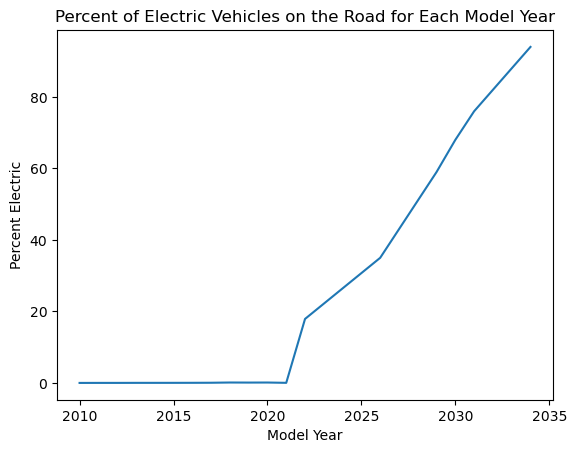

In [109]:

plt.plot(percents['total_years'][35:60],percents['EV_percent'][35:60])
plt.ylabel('Percent Electric')
plt.xlabel('Model Year')
plt.title('Percent of Electric Vehicles on the Road for Each Model Year')
plt.show()

In [31]:
percents.iloc[0,1]

0.00010499376599514404

In [110]:
pred_pop = []
pred_EV = []
for i in range(1960,2020):
    pred_pop.append(model(i))
    pred_EV.append(model(i)*(percents.iloc[i-1960,1])/100)
sum(pred_EV)

1882584.8713741102

In [115]:
pred_EV[60-16]

124.97330398631294

In [112]:
np.subtract(pred_pop,pred_EV)

array([  2819.00578545,   2208.91551042,   1781.99064659,   1478.59688845,
         1260.61207156,   1103.23685425,    990.17129376,    910.44931655,
          856.81564243,    824.47841798,    810.41153349,    812.90627104,
          831.30041495,    865.8293563 ,    917.56545118,    988.43422891,
         1081.27754298,   1199.99522832,   1349.73089062,   1537.16801263,
         1770.79653091,   2061.41415165,   2422.62726096,   2871.47606971,
         3429.21741092,   4122.23781146,   4983.00917366,   6051.20908538,
         7375.04343465,   9012.15472499,  11030.85593357,  13510.79029451,
        16543.11094093,  20229.72773144,  24682.09894542,  30016.26049887,
        36346.65554171,  43785.99145052,  52417.37753957,  62307.03092123,
        73460.03346424,  85816.63344123,  99234.262597  , 113453.66761842,
       128442.48527368, 143881.27577102, 159761.91996057, 144187.95236243,
       148870.76702881, 151935.77280392, 153287.67313986, 152878.8272883 ,
       141463.94575771, 1

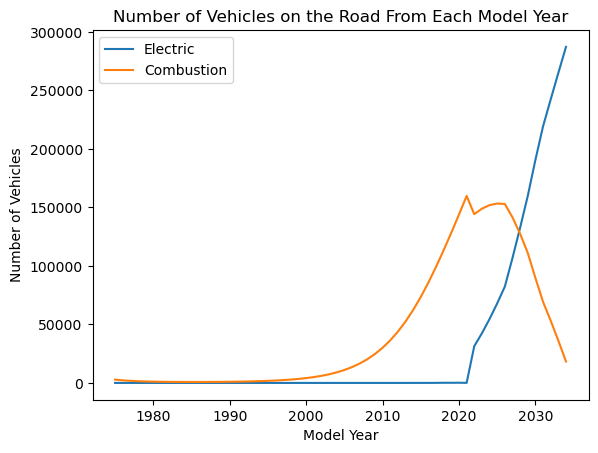

In [113]:

plt.figure()
plt.plot(np.arange(1975,2035),pred_EV)
#plt.plot(np.arange(1975,2035),pred_pop)
plt.plot(np.arange(1975,2035),np.subtract(pred_pop,pred_EV))
plt.ylabel('Number of Vehicles')
plt.xlabel('Model Year')
plt.title('Number of Vehicles on the Road From Each Model Year')
plt.legend(['Electric', 'Combustion'])
plt.show()

In [34]:
sum(pred_pop)

2854482.0793385273

In [116]:
percent_EV_2035 = sum(pred_EV)/sum(pred_pop)
percent_EV_2035

0.4217366135393132

In [42]:
198000000*percent_EV_2035

83605532.32989442

In [35]:
model(2019)

191786.73266716275

In [36]:
predictions = dfn.copy()
start_year = 2019
end_year = 2035
years = range(start_year, end_year+1)
num_vehicles = np.ones(len(years))*sum(times['Vehicle Population'])

for i in years:
    for j in range(1960,2020):
        

IndentationError: expected an indented block (996345401.py, line 9)

In [37]:
120/285

0.42105263157894735

In [38]:
170*0.42

71.39999999999999

In [39]:
EVs = totals['Vehicle Population'][0] + totals['Vehicle Population'][2]
ev_retire_rate = 0.05
total_sales = 2000000
EVs = totals['Vehicle Population'][0] + totals['Vehicle Population'][2]
for i in range(0, 18):
    EVs = EVs - (EVs*ev_retire_rate) + (total_sales * sales_percentage[i]/100)
EVs

13158984.115757229